In [1]:
# Machine learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# For data manipulation
import pandas as pd
import numpy as np
# To plot
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Nifty50_processed_data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,PCR,pcr_sa,SMA20,EMA20,Return,Volatile,ATRr_14,RSI,MACD,MSig,MHist
0,2022-12-02,18752.40039,18781.94922,18639.19922,18696.09961,18696.09961,254400,0.937,1,18377.755078,18489.099551,-0.000265,0.032970,209.469134,66.463589,-60.793157,-87.037302,26.244145
1,2022-12-01,18871.94922,18887.59961,18778.19922,18812.50000,18812.50000,325000,1.265,0,18408.830078,18523.729683,0.006226,0.033151,207.842540,70.142418,-8.011183,-56.014654,48.003471
2,2022-11-30,18625.69922,18816.05078,18616.55078,18758.34961,18758.34961,345600,1.553,0,18440.622558,18548.559025,-0.002878,0.033008,207.101509,66.488399,22.142759,-39.864375,62.007134
3,2022-11-29,18552.44922,18678.09961,18552.15039,18618.05078,18618.05078,195300,1.278,0,18464.910059,18555.836130,-0.007479,0.034268,207.022733,58.050521,45.839654,-26.133574,71.973228
4,2022-11-28,18430.55078,18614.25000,18365.59961,18562.75000,18562.75000,206500,1.281,0,18492.317578,18556.553344,-0.002970,0.033594,210.926949,55.083174,64.656550,-13.850072,78.506622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2021-02-24,14729.15039,15008.79980,14504.50000,14982.00000,14982.00000,403800,1.362,0,14888.879981,14886.743964,-0.007640,0.063403,355.787248,52.451353,-30.640836,-54.146013,23.505177
439,2021-02-23,14782.25000,14854.50000,14651.84961,14707.79980,14707.79980,744100,1.059,-1,14896.799951,14869.701662,-0.018302,0.064966,353.956044,46.908554,-18.194890,-55.236570,37.041680
440,2021-02-22,14999.04980,15010.09961,14635.04980,14675.70020,14675.70020,609900,0.993,1,14889.847461,14851.225333,-0.002182,0.062298,355.462741,46.291827,11.069578,-39.781245,50.850823
441,2021-02-19,15074.79980,15144.04980,14898.20020,14981.75000,14981.75000,712200,1.192,-1,14902.114941,14863.656253,0.020854,0.065531,363.526088,52.679824,15.526124,-45.270010,60.796134


In [3]:
X = df[['Open', 'High', 'Low', 'Volume', 'PCR', 'pcr_sa','Adj Close', 'EMA20', 'SMA20', 'Return', 'Volatile', 'RSI', 'MACD', 'ATRr_14']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

enet = ElasticNet(alpha=1)
enet.fit(X_scaled, y)

feature_enet = enet.coef_
#important_features_enet = np.abs(feature_enet) > np.mean(np.abs(feature_enet))

# Get selected features
selected_features_enet = X.columns[feature_enet != 0]
print("Selected features of ElasticNet:", selected_features_enet)

Selected features of ElasticNet: Index(['Open', 'High', 'Low', 'Volume', 'PCR', 'pcr_sa', 'Adj Close', 'EMA20',
       'SMA20', 'Return', 'Volatile', 'RSI', 'MACD', 'ATRr_14'],
      dtype='object')


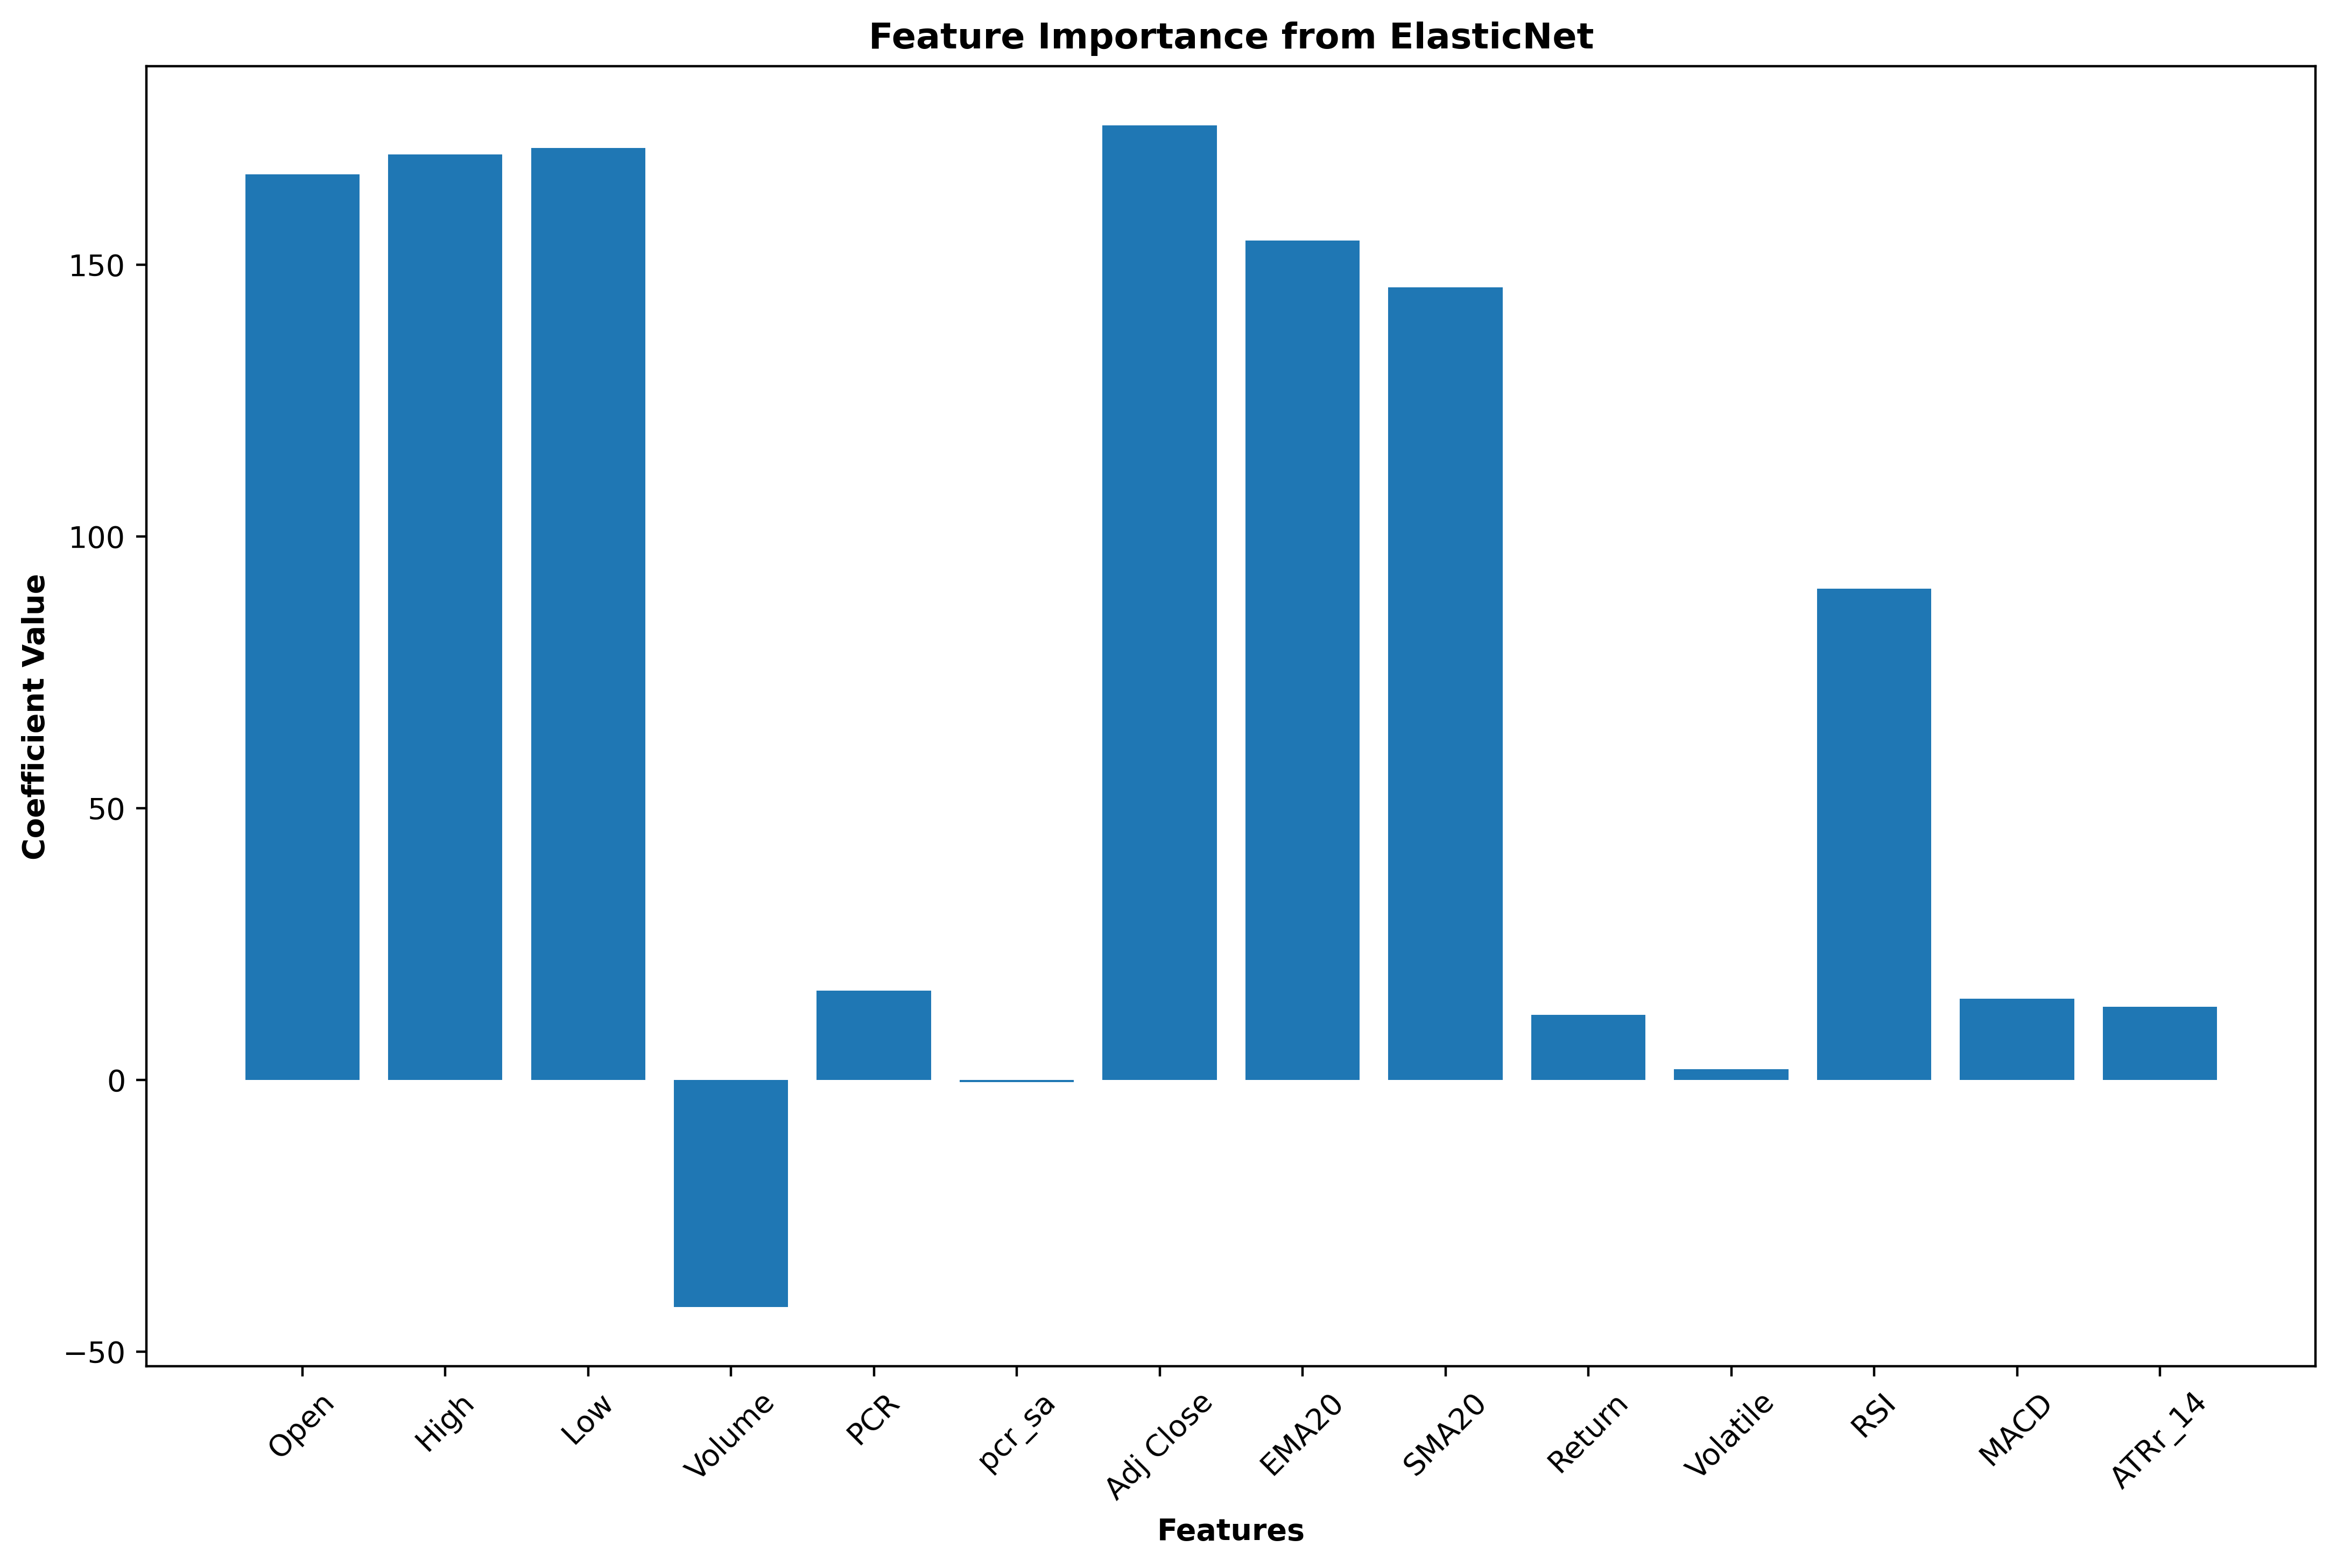

In [4]:
plt.figure(figsize=(13, 8), dpi = 400)
plt.bar(X.columns, feature_enet)
plt.title('Feature Importance from ElasticNet', weight = 'bold')
plt.ylabel('Coefficient Value', weight = 'bold')
plt.xlabel('Features', weight = 'bold')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume,PCR,pcr_sa,SMA20,EMA20,Return,Volatile,ATRr_14,RSI,MACD,MSig,MHist
Date,,,,,,,,,,,,,,,,,
2022-12-02,18752.40039,18781.94922,18639.19922,18696.09961,18696.09961,254400,0.937,1,18377.755078,18489.099551,-0.000265,0.032970,209.469134,66.463589,-60.793157,-87.037302,26.244145
2022-12-01,18871.94922,18887.59961,18778.19922,18812.50000,18812.50000,325000,1.265,0,18408.830078,18523.729683,0.006226,0.033151,207.842540,70.142418,-8.011183,-56.014654,48.003471
2022-11-30,18625.69922,18816.05078,18616.55078,18758.34961,18758.34961,345600,1.553,0,18440.622558,18548.559025,-0.002878,0.033008,207.101509,66.488399,22.142759,-39.864375,62.007134
2022-11-29,18552.44922,18678.09961,18552.15039,18618.05078,18618.05078,195300,1.278,0,18464.910059,18555.836130,-0.007479,0.034268,207.022733,58.050521,45.839654,-26.133574,71.973228
2022-11-28,18430.55078,18614.25000,18365.59961,18562.75000,18562.75000,206500,1.281,0,18492.317578,18556.553344,-0.002970,0.033594,210.926949,55.083174,64.656550,-13.850072,78.506622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,14729.15039,15008.79980,14504.50000,14982.00000,14982.00000,403800,1.362,0,14888.879981,14886.743964,-0.007640,0.063403,355.787248,52.451353,-30.640836,-54.146013,23.505177
2021-02-23,14782.25000,14854.50000,14651.84961,14707.79980,14707.79980,744100,1.059,-1,14896.799951,14869.701662,-0.018302,0.064966,353.956044,46.908554,-18.194890,-55.236570,37.041680
2021-02-22,14999.04980,15010.09961,14635.04980,14675.70020,14675.70020,609900,0.993,1,14889.847461,14851.225333,-0.002182,0.062298,355.462741,46.291827,11.069578,-39.781245,50.850823


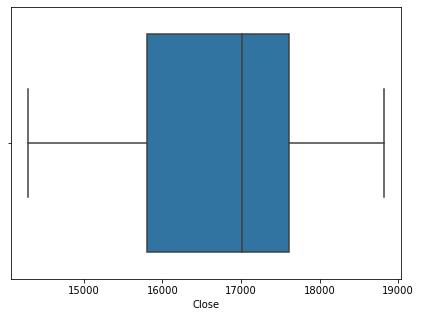

In [6]:
import seaborn as sb

plt.subplots(figsize=(7,5))
sb.boxplot(df['Close'])
plt.show()

In [7]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2022-12-02,56.30078,142.75000
2022-12-01,59.44922,109.40039
2022-11-30,-132.65039,199.50000
2022-11-29,-65.60156,125.94922
2022-11-28,-132.19922,248.65039


In [8]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

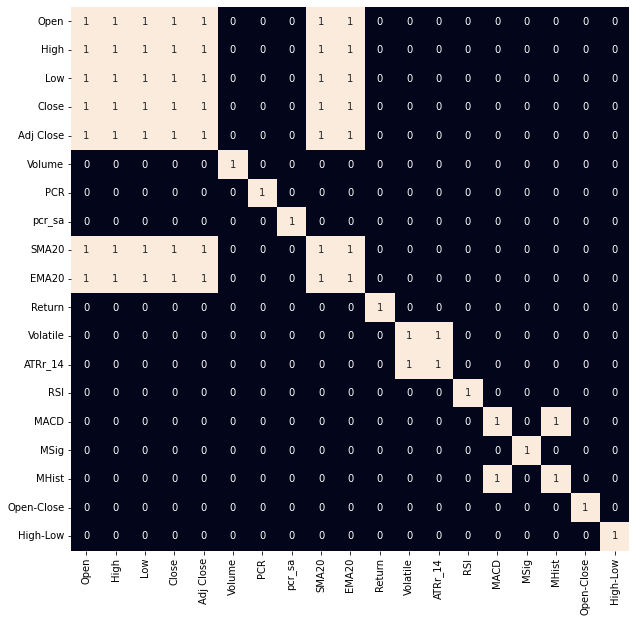

In [9]:
import seaborn as sb
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [10]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

In [14]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print transformed dataset
print(X_train_pca_df.head())

Explained Variance Ratio: [0.59666244 0.40333756]
        PC1       PC2
0 -0.157791  0.692454
1 -0.396824  0.964977
2 -0.727464 -0.747717
3 -0.934974  0.172981
4 -0.348102 -1.122280


In [45]:
ica = FastICA(n_components=2, random_state=42)  # Reduce to 2 independent components
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

In [46]:
ica_columns = [f'IC{i+1}' for i in range(X_train_ica.shape[1])]
X_train_ica_df = pd.DataFrame(X_train_ica, columns=ica_columns)
X_test_ica_df = pd.DataFrame(X_test_ica, columns=ica_columns)

# Print transformed dataset
print(X_train_ica_df.head())

        IC1       IC2
0 -0.176518  0.764272
1 -0.407815  1.058295
2 -0.630587 -0.859592
3 -0.863191  0.156684
4 -0.266196 -1.261763


In [48]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1 discriminant component
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [49]:
lda_columns = [f'LD{i+1}' for i in range(X_train_lda.shape[1])]
X_train_lda_df = pd.DataFrame(X_train_lda, columns=lda_columns)
X_test_lda_df = pd.DataFrame(X_test_lda, columns=lda_columns)

# Print transformed dataset
print(X_train_lda_df.head())

        LD1
0  0.316430
1  0.263905
2 -1.240170
3 -0.817147
4 -1.117115


In [19]:
#DET_cls = DecisionTreeClassifier().fit(X_train, y_train)
GNB_cls = GaussianNB().fit(X_train, y_train)
KNN_cls = KNeighborsClassifier().fit(X_train, y_train)
#LDA_cls = LinearDiscriminantAnalysis().fit(X_train, y_train)
LOG_cls = LogisticRegression().fit(X_train, y_train)
MLP_cls = MLPClassifier().fit(X_train, y_train)
QDA_cls = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
#RAF_cls = RandomForestClassifier().fit(X_train, y_train)
SGD_cls = SGDClassifier().fit(X_train, y_train)
SVC_cls = SVC().fit(X_train, y_train)
XGB_cls = XGBClassifier().fit(X_train, y_train)

In [20]:
#prediction
#df['P_DET'] = DET_cls.predict(X)
df['P_GNB'] = GNB_cls.predict(X)
df['P_KNN'] = KNN_cls.predict(X)
#df['P_LDA'] = LDA_cls.predict(X)
df['P_LOG'] = LOG_cls.predict(X)
df['P_MLP'] = MLP_cls.predict(X)
df['P_QDA'] = QDA_cls.predict(X)
#df['P_RAF'] = RAF_cls.predict(X)
df['P_SGD'] = SGD_cls.predict(X)
df['P_SVC'] = SVC_cls.predict(X)
df['P_XGB'] = XGB_cls.predict(X)

In [21]:
df['Return'] = df.Close.pct_change()

In [22]:
#strategic return
#df['SR_DET'] = df.Return *df.P_DET.shift(1)
df['SR_GNB'] = df.Return *df.P_GNB.shift(1)
df['SR_KNN'] = df.Return *df.P_KNN.shift(1)
#df['SR_LDA'] = df.Return *df.P_LDA.shift(1)
df['SR_LOG'] = df.Return *df.P_LOG.shift(1)
df['SR_MLP'] = df.Return *df.P_MLP.shift(1)
df['SR_QDA'] = df.Return *df.P_QDA.shift(1)
#df['SR_RAF'] = df.Return *df.P_RAF.shift(1)
df['SR_SGD'] = df.Return *df.P_SGD.shift(1)
df['SR_SVC'] = df.Return *df.P_SVC.shift(1)
df['SR_XGB'] = df.Return *df.P_XGB.shift(1)

In [23]:
df['Cum_Ret'] = df['Return'].cumsum()
df.head()

,Open,High,Low,Close,Adj Close,Volume,PCR,pcr_sa,SMA20,EMA20,...,P_XGB,SR_GNB,SR_KNN,SR_LOG,SR_MLP,SR_QDA,SR_SGD,SR_SVC,SR_XGB,Cum_Ret
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,18752.40039,18781.94922,18639.19922,18696.09961,18696.09961,254400,0.937,1,18377.755078,18489.099551,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,18871.94922,18887.59961,18778.19922,18812.50000,18812.50000,325000,1.265,0,18408.830078,18523.729683,...,0,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226
2022-11-30,18625.69922,18816.05078,18616.55078,18758.34961,18758.34961,345600,1.553,0,18440.622558,18548.559025,...,0,-0.002878,-0.000000,-0.002878,-0.002878,-0.000000,-0.002878,-0.002878,-0.000000,0.003347
2022-11-29,18552.44922,18678.09961,18552.15039,18618.05078,18618.05078,195300,1.278,0,18464.910059,18555.836130,...,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.004132
2022-11-28,18430.55078,18614.25000,18365.59961,18562.75000,18562.75000,206500,1.281,0,18492.317578,18556.553344,...,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.007102


In [24]:
#df['Cum_S_DET'] = df['SR_DET'].cumsum()
df['Cum_S_GNB'] = df['SR_GNB'].cumsum()
df['Cum_S_KNN'] = df['SR_KNN'].cumsum()
#df['Cum_S_LDA'] = df['SR_LDA'].cumsum()
df['Cum_S_LOG'] = df['SR_LOG'].cumsum()
df['Cum_S_MLP'] = df['SR_MLP'].cumsum()
df['Cum_S_QDA'] = df['SR_QDA'].cumsum()
#df['Cum_S_RAF'] = df['SR_RAF'].cumsum()
df['Cum_S_SGD'] = df['SR_SGD'].cumsum()
df['Cum_S_SVC'] = df['SR_SVC'].cumsum()
df['Cum_S_XGB'] = df['SR_XGB'].cumsum()
df.head()

,Open,High,Low,Close,Adj Close,Volume,PCR,pcr_sa,SMA20,EMA20,...,SR_XGB,Cum_Ret,Cum_S_GNB,Cum_S_KNN,Cum_S_LOG,Cum_S_MLP,Cum_S_QDA,Cum_S_SGD,Cum_S_SVC,Cum_S_XGB
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,18752.40039,18781.94922,18639.19922,18696.09961,18696.09961,254400,0.937,1,18377.755078,18489.099551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,18871.94922,18887.59961,18778.19922,18812.50000,18812.50000,325000,1.265,0,18408.830078,18523.729683,...,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226,0.006226
2022-11-30,18625.69922,18816.05078,18616.55078,18758.34961,18758.34961,345600,1.553,0,18440.622558,18548.559025,...,-0.000000,0.003347,0.003347,0.006226,0.003347,0.003347,0.006226,0.003347,0.003347,0.006226
2022-11-29,18552.44922,18678.09961,18552.15039,18618.05078,18618.05078,195300,1.278,0,18464.910059,18555.836130,...,-0.000000,-0.004132,0.003347,0.006226,0.003347,0.003347,0.006226,0.003347,0.003347,0.006226
2022-11-28,18430.55078,18614.25000,18365.59961,18562.75000,18562.75000,206500,1.281,0,18492.317578,18556.553344,...,-0.000000,-0.007102,0.003347,0.006226,0.003347,0.003347,0.006226,0.003347,0.003347,0.006226


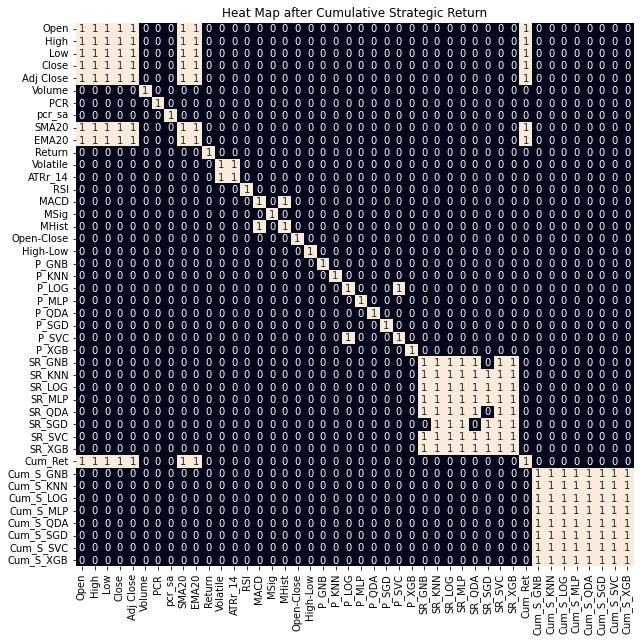

In [25]:
import seaborn as sb
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.title('Heat Map after Cumulative Strategic Return')
plt.show()

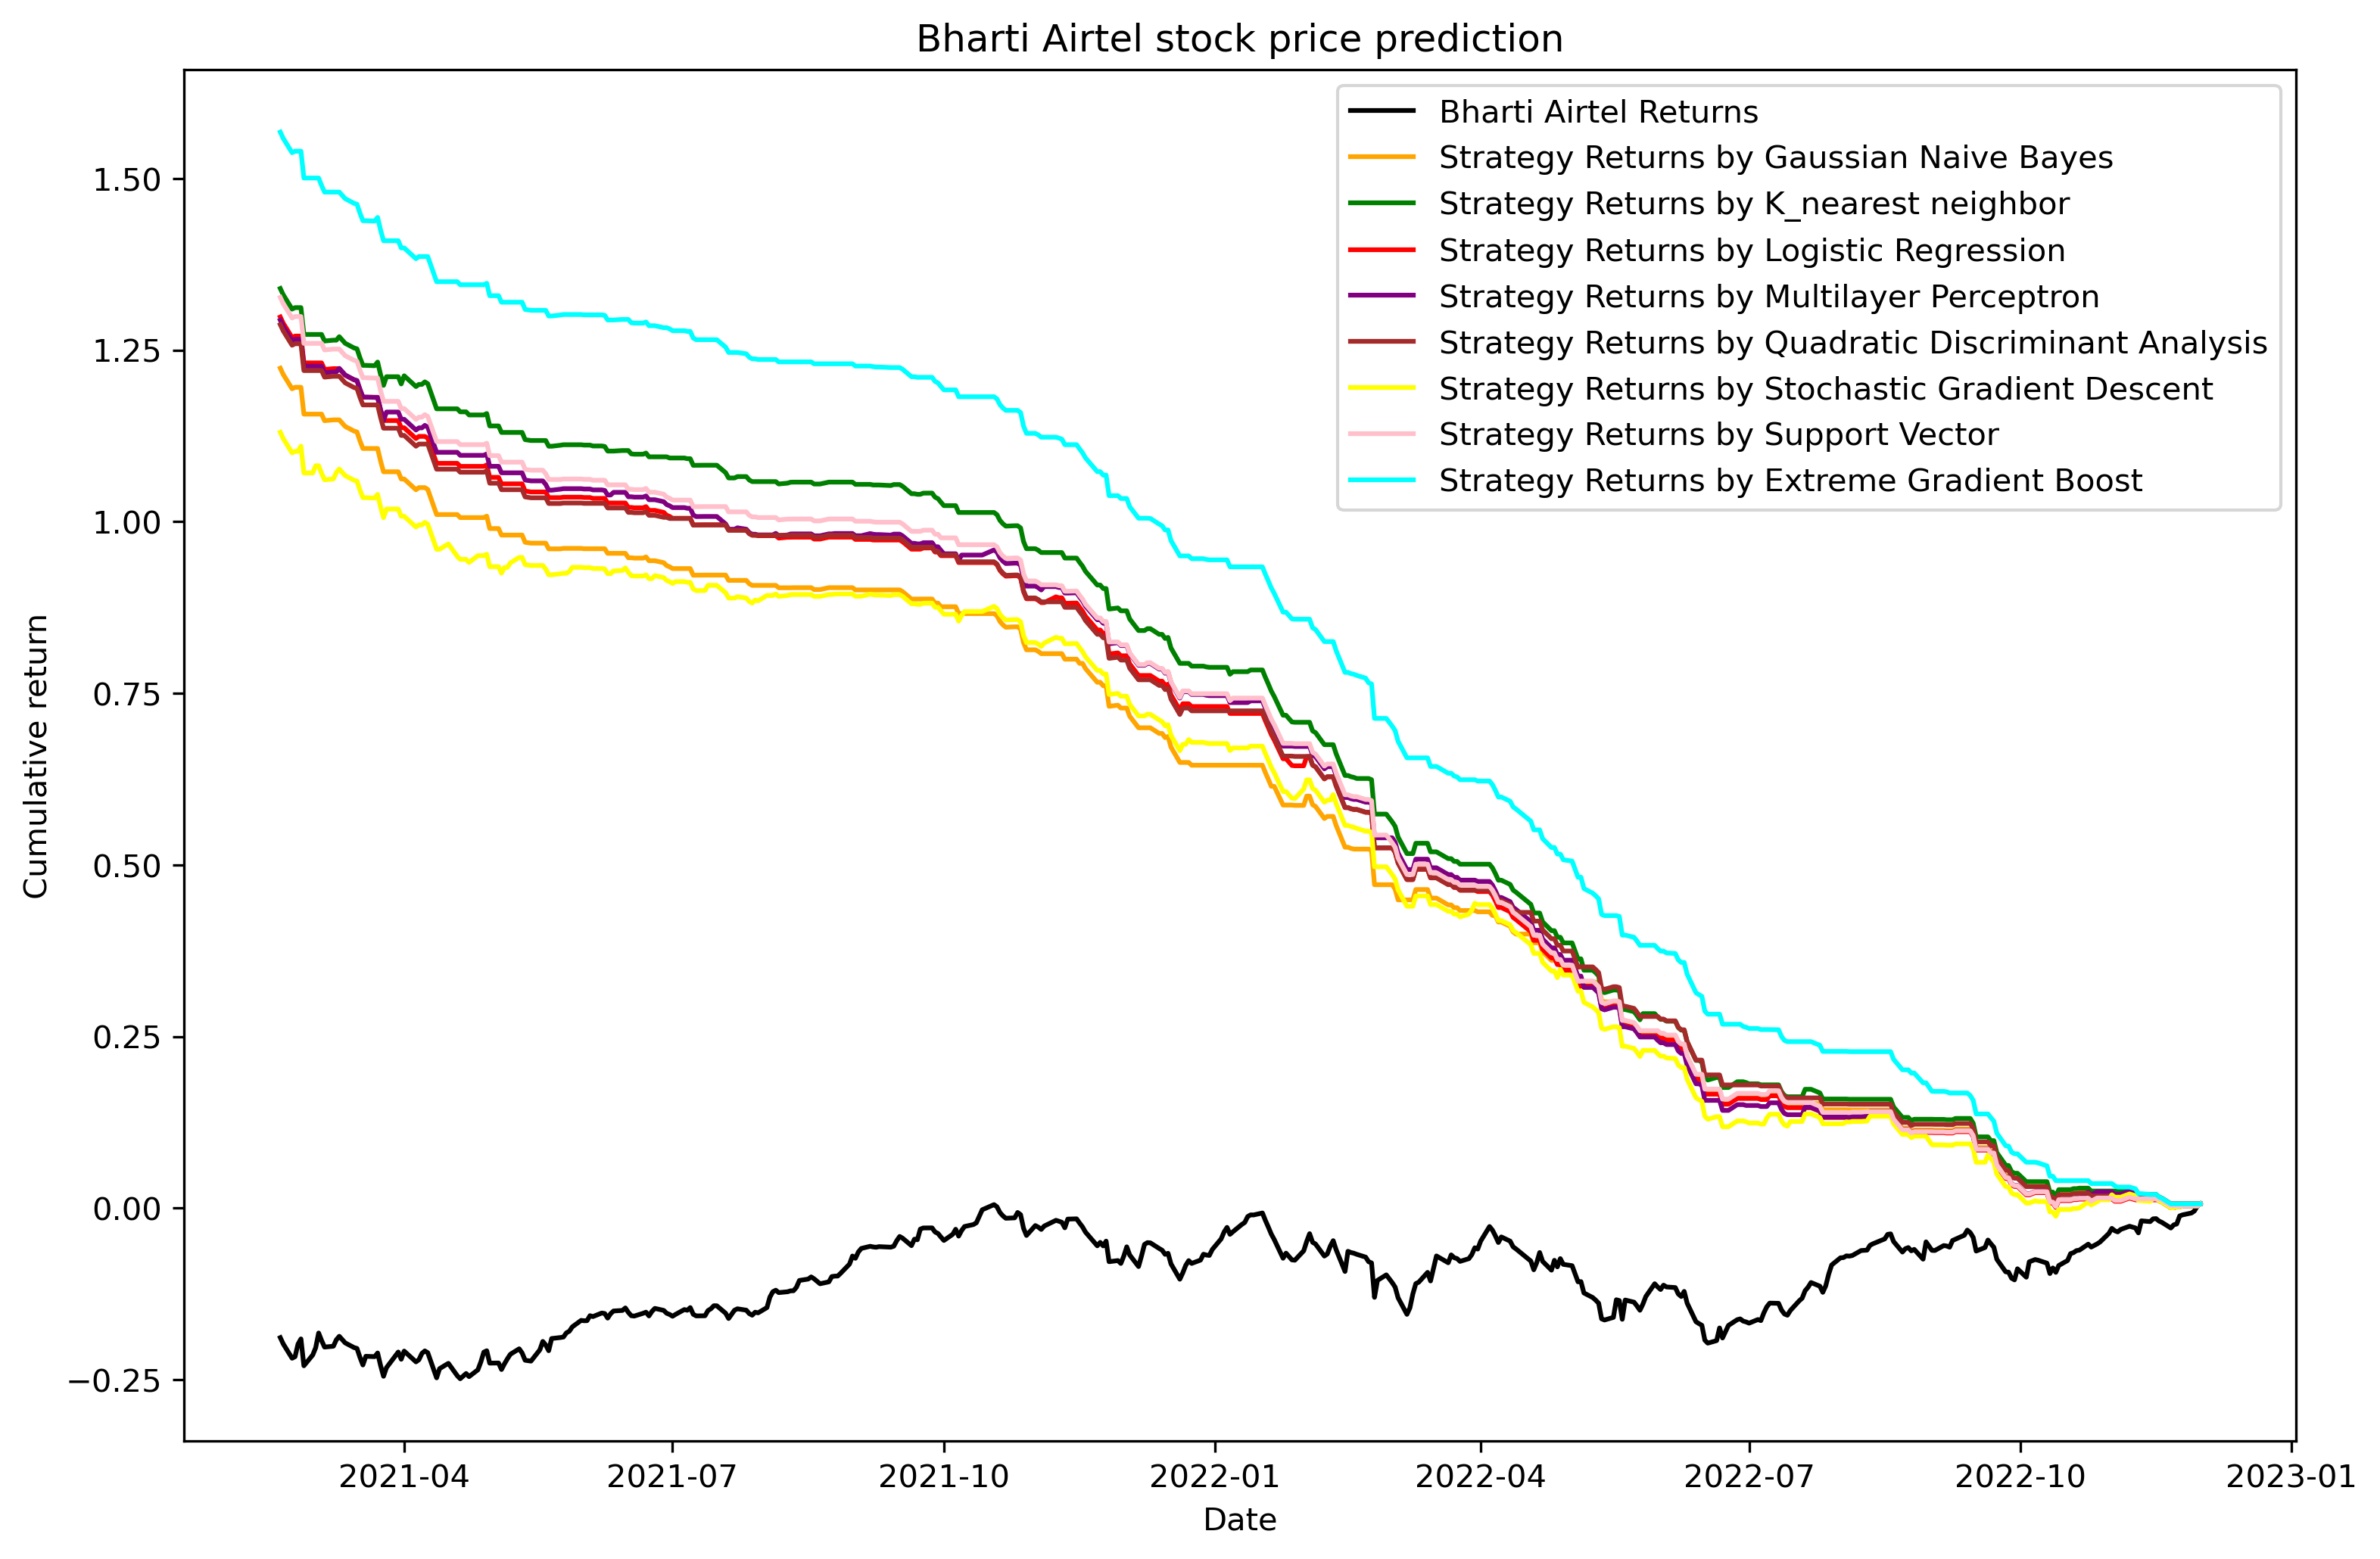

In [26]:
plt.figure(figsize=(12, 8), dpi = 300)
plt.plot(df['Cum_Ret'],color='black', label = 'Nifty50 Returns')
#plt.plot(df['Cum_S_DET'],color='blue', label = 'Strategy Returns by Decision Tree')
plt.plot(df['Cum_S_GNB'],color='orange', label = 'Strategy Returns by Gaussian Naive Bayes')
plt.plot(df['Cum_S_KNN'],color='green', label = 'Strategy Returns by K_nearest neighbor')
#plt.plot(df['Cum_S_LDA'],color='violet', label = 'Strategy Returns by Linear Discriminant Analysis')
plt.plot(df['Cum_S_LOG'],color='red', label = 'Strategy Returns by Logistic Regression')
plt.plot(df['Cum_S_MLP'],color='purple', label = 'Strategy Returns by Multilayer Perceptron')
plt.plot(df['Cum_S_QDA'],color='brown', label = 'Strategy Returns by Quadratic Discriminant Analysis')
#plt.plot(df['Cum_S_RAF'],color='magenta', label = 'Strategy Returns by Random Forest')
plt.plot(df['Cum_S_SGD'],color='yellow', label = 'Strategy Returns by Stochastic Gradient Descent')
plt.plot(df['Cum_S_SVC'],color='pink', label = 'Strategy Returns by Support Vector')
plt.plot(df['Cum_S_XGB'],color='cyan', label = 'Strategy Returns by Extreme Gradient Boost')
plt.title('Nifty50 prediction')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()

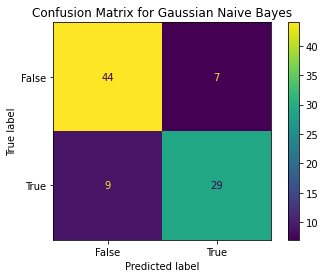

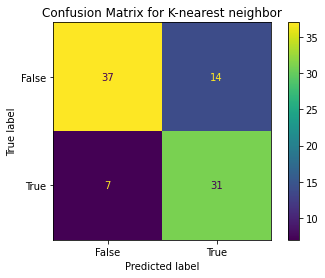

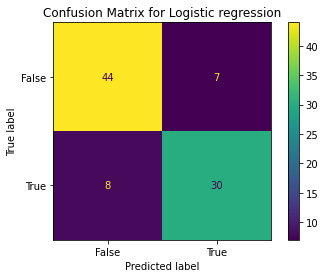

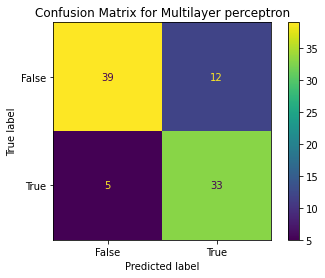

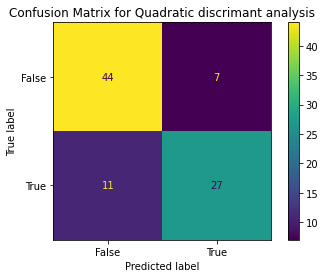

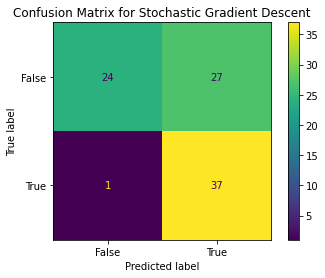

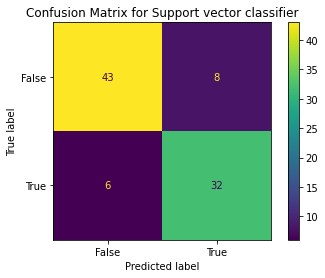

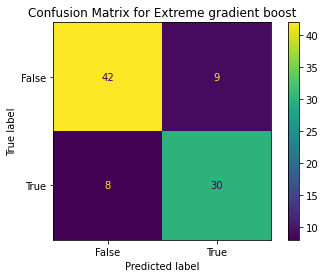

In [27]:
#cm_DET =metrics.confusion_matrix(y_test, DET_cls.predict(X_test))
cm_GNB =metrics.confusion_matrix(y_test, GNB_cls.predict(X_test))
cm_KNN =metrics.confusion_matrix(y_test, KNN_cls.predict(X_test))
#cm_LDA =metrics.confusion_matrix(y_test, LDA_cls.predict(X_test))
cm_LOG =metrics.confusion_matrix(y_test, LOG_cls.predict(X_test))
cm_MLP =metrics.confusion_matrix(y_test, MLP_cls.predict(X_test))
cm_QDA =metrics.confusion_matrix(y_test, QDA_cls.predict(X_test))
#cm_RAF =metrics.confusion_matrix(y_test, RAF_cls.predict(X_test))
cm_SGD =metrics.confusion_matrix(y_test, SGD_cls.predict(X_test))
cm_SVC =metrics.confusion_matrix(y_test, SVC_cls.predict(X_test))
cm_XGB =metrics.confusion_matrix(y_test, XGB_cls.predict(X_test))

#cm_display_DET = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_DET, display_labels = [False, True])
cm_display_GNB = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_GNB, display_labels = [False, True])
cm_display_KNN = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_KNN, display_labels = [False, True])
#cm_display_LDA = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_LDA, display_labels = [False, True])
cm_display_LOG = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_LOG, display_labels = [False, True])
cm_display_MLP = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_MLP, display_labels = [False, True])
cm_display_QDA = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_QDA, display_labels = [False, True])
#cm_display_RAF = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_RAF, display_labels = [False, True])
cm_display_SGD = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_SGD, display_labels = [False, True])
cm_display_SVC = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_SVC, display_labels = [False, True])
cm_display_XGB = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_XGB, display_labels = [False, True])

#cm_display_DET.plot()
cm_display_GNB.plot()
cm_display_KNN.plot()
#cm_display_LDA.plot()
cm_display_LOG.plot()
cm_display_MLP.plot()
cm_display_QDA.plot()
#cm_display_RAF.plot()
cm_display_SGD.plot()
cm_display_SVC.plot()
cm_display_XGB.plot()

#cm_display_DET.ax_.set_title("Confusion Matrix for Decision Tree")
cm_display_GNB.ax_.set_title("Confusion Matrix for Gaussian Naive Bayes")
cm_display_KNN.ax_.set_title("Confusion Matrix for K-nearest neighbor")
#cm_display_LDA.ax_.set_title("Confusion Matrix for Linear Discriminant Analysis")
cm_display_LOG.ax_.set_title("Confusion Matrix for Logistic regression")
cm_display_MLP.ax_.set_title("Confusion Matrix for Multilayer perceptron")
cm_display_QDA.ax_.set_title("Confusion Matrix for Quadratic discrimant analysis")
#cm_display_RAF.ax_.set_title("Confusion Matrix for Quadratic discrimant analysis")
cm_display_SGD.ax_.set_title("Confusion Matrix for Stochastic Gradient Descent")
cm_display_SVC.ax_.set_title("Confusion Matrix for Support vector classifier")
cm_display_XGB.ax_.set_title("Confusion Matrix for Extreme gradient boost")
plt.show()

In [28]:
#import scikitplot as skplt
#y_probs = LOG_cls.predict_proba(X_test)
#skplt.metrics.plot_roc_curve(y_test, y_probs, title="ROC Curve", figsize=(12,6));

In [29]:
Accuracy_GNB= metrics.accuracy_score(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes Accuracy:                         ", Accuracy_GNB)

Precision_GNB = metrics.precision_score(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes Precision:                        ", Precision_GNB)

Sensitivity_recall_GNB = metrics.recall_score(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes Recall/TPR:                       ", Sensitivity_recall_GNB)

Specificity_GNB = metrics.recall_score(y_test, GNB_cls.predict(X_test), pos_label=0)
print("Gaussian Naive Bayes Specificity/TNR:                  ", Specificity_GNB)

F1_score_GNB = metrics.f1_score(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes F1_score:                         ", F1_score_GNB)

ACR_GNB = (Sensitivity_recall_GNB+Specificity_GNB)/2
print("Gaussian Naive Bayes Average Correction Rate:          ", ACR_GNB)

Hamming_loss_GNB = 1-Accuracy_GNB
print("Gaussian Naive Bayes Hamming loss:                     ", Hamming_loss_GNB)

from sklearn.metrics import matthews_corrcoef
MCC_GNB = matthews_corrcoef(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes Matthews Correlation Coefficient: ", MCC_GNB)

from sklearn.metrics import log_loss
LL_GNB = log_loss(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes Cross-entropy or Log-loss:        ", LL_GNB)

from sklearn.metrics import roc_auc_score
AUC_GNB = roc_auc_score(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes AUC-score:                        ", AUC_GNB)

from sklearn.metrics import det_curve
fpr_GNB, fnr_GNB, thresholds = det_curve(y_test, GNB_cls.predict(X_test))
print("Gaussian Naive Bayes False Positive Rate:              ", fpr_GNB)
print("Gaussian Naive Bayes False Negative Rate:              ", fnr_GNB)

Gaussian Naive Bayes Accuracy:                          0.8202247191011236
Gaussian Naive Bayes Precision:                         0.8055555555555556
Gaussian Naive Bayes Recall/TPR:                        0.7631578947368421
Gaussian Naive Bayes Specificity/TNR:                   0.8627450980392157
Gaussian Naive Bayes F1_score:                          0.7837837837837838
Gaussian Naive Bayes Average Correction Rate:           0.8129514963880289
Gaussian Naive Bayes Hamming loss:                      0.1797752808988764
Gaussian Naive Bayes Matthews Correlation Coefficient:  0.6308044223069221
Gaussian Naive Bayes Cross-entropy or Log-loss:         6.479757912650275
Gaussian Naive Bayes AUC-score:                         0.8129514963880289
Gaussian Naive Bayes False Positive Rate:               [1.        0.1372549]
Gaussian Naive Bayes False Negative Rate:               [0.         0.23684211]


In [30]:
Accuracy_KNN= metrics.accuracy_score(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor Accuracy:                         ", Accuracy_KNN)

Precision_KNN = metrics.precision_score(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor Precision:                        ", Precision_KNN)

Sensitivity_recall_KNN = metrics.recall_score(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor Recall/TPR:                       ", Sensitivity_recall_KNN)

Specificity_KNN = metrics.recall_score(y_test, KNN_cls.predict(X_test), pos_label=0)
print("K-Nearest Neighbor Specificity/TNR:                  ", Specificity_KNN)

F1_score_KNN = metrics.f1_score(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor F1_score:                         ", F1_score_KNN)

ACR_KNN = (Sensitivity_recall_KNN+Specificity_KNN)/2
print("K-Nearest Neighbor Average Correction Rate:          ", ACR_KNN)

Hamming_loss_KNN = 1-Accuracy_KNN
print("K-Nearest Neighbor Hamming loss:                     ", Hamming_loss_KNN)

from sklearn.metrics import matthews_corrcoef
MCC_KNN = matthews_corrcoef(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor Matthews Correlation Coefficient: ", MCC_KNN)

from sklearn.metrics import log_loss
LL_KNN = log_loss(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor Cross-entropy or Log-loss:        ", LL_KNN)

from sklearn.metrics import roc_auc_score
AUC_KNN = roc_auc_score(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor AUC-score:                        ", AUC_KNN)

from sklearn.metrics import det_curve
fpr_KNN, fnr_KNN, thresholds = det_curve(y_test, KNN_cls.predict(X_test))
print("K-Nearest Neighbor False Positive Rate:              ", fpr_KNN)
print("K-Nearest Neighbor False Negative Rate:              ", fnr_KNN)

K-Nearest Neighbor Accuracy:                          0.7640449438202247
K-Nearest Neighbor Precision:                         0.6888888888888889
K-Nearest Neighbor Recall/TPR:                        0.8157894736842105
K-Nearest Neighbor Specificity/TNR:                   0.7254901960784313
K-Nearest Neighbor F1_score:                          0.7469879518072289
K-Nearest Neighbor Average Correction Rate:           0.7706398348813209
K-Nearest Neighbor Hamming loss:                      0.2359550561797753
K-Nearest Neighbor Matthews Correlation Coefficient:  0.5355080536704984
K-Nearest Neighbor Cross-entropy or Log-loss:         8.504682260353485
K-Nearest Neighbor AUC-score:                         0.770639834881321
K-Nearest Neighbor False Positive Rate:               [1.        0.2745098]
K-Nearest Neighbor False Negative Rate:               [0.         0.18421053]


In [31]:
Accuracy_LOG= metrics.accuracy_score(y_test, LOG_cls.predict(X_test))
print("Logistic Regression Accuracy:                         ", Accuracy_LOG)

Precision_LOG = metrics.precision_score(y_test, LOG_cls.predict(X_test))
print("Logistic Regression Precision:                        ", Precision_LOG)

Sensitivity_recall_LOG = metrics.recall_score(y_test, LOG_cls.predict(X_test))
print("Logistic Regression Recall/TPR:                       ", Sensitivity_recall_LOG)

Specificity_LOG = metrics.recall_score(y_test, LOG_cls.predict(X_test), pos_label=0)
print("Logistic Regression Specificity/TNR:                  ", Specificity_LOG)

F1_score_LOG = metrics.f1_score(y_test, LOG_cls.predict(X_test))
print("Logistic Regression F1_score:                         ", F1_score_LOG)

ACR_LOG = (Sensitivity_recall_LOG+Specificity_LOG)/2
print("Logistic Regression Average Correction Rate:          ", ACR_LOG)

Hamming_loss_LOG = 1-Accuracy_LOG
print("Logistic Regression Hamming loss:                     ", Hamming_loss_LOG)

from sklearn.metrics import matthews_corrcoef
MCC_LOG = matthews_corrcoef(y_test, LOG_cls.predict(X_test))
print("Logistic Regression Matthews Correlation Coefficient: ", MCC_LOG)

from sklearn.metrics import log_loss
LL_LOG = log_loss(y_test, LOG_cls.predict(X_test))
print("Logistic Regression Cross-entropy or Log-loss:        ", LL_LOG)

from sklearn.metrics import roc_auc_score
AUC_LOG = roc_auc_score(y_test, LOG_cls.predict(X_test))
print("Logistic Regression AUC-score:                        ", AUC_LOG)

from sklearn.metrics import det_curve
fpr_LOG, fnr_LOG, thresholds = det_curve(y_test, LOG_cls.predict(X_test))
print("Logistic Regression False Positive Rate:              ", fpr_LOG)
print("Logistic Regression False Negative Rate:              ", fnr_LOG)

Logistic Regression Accuracy:                          0.8314606741573034
Logistic Regression Precision:                         0.8108108108108109
Logistic Regression Recall/TPR:                        0.7894736842105263
Logistic Regression Specificity/TNR:                   0.8627450980392157
Logistic Regression F1_score:                          0.8
Logistic Regression Average Correction Rate:           0.826109391124871
Logistic Regression Hamming loss:                      0.1685393258426966
Logistic Regression Matthews Correlation Coefficient:  0.6545874185673048
Logistic Regression Cross-entropy or Log-loss:         6.074773043109633
Logistic Regression AUC-score:                         0.826109391124871
Logistic Regression False Positive Rate:               [1.        0.1372549]
Logistic Regression False Negative Rate:               [0.         0.21052632]


In [32]:
Accuracy_MLP= metrics.accuracy_score(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron Accuracy:                         ", Accuracy_MLP)

Precision_MLP = metrics.precision_score(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron Precision:                        ", Precision_MLP)

Sensitivity_recall_MLP = metrics.recall_score(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron Recall/TPR:                       ", Sensitivity_recall_MLP)

Specificity_MLP = metrics.recall_score(y_test, MLP_cls.predict(X_test), pos_label=0)
print("Multilayer Perceptron Specificity/TNR:                  ", Specificity_MLP)

F1_score_MLP = metrics.f1_score(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron F1_score:                         ", F1_score_MLP)

ACR_MLP = (Sensitivity_recall_MLP+Specificity_MLP)/2
print("Multilayer Perceptron Average Correction Rate:          ", ACR_MLP)

Hamming_loss_MLP = 1-Accuracy_MLP
print("Multilayer Perceptron Hamming loss:                     ", Hamming_loss_MLP)

from sklearn.metrics import matthews_corrcoef
MCC_MLP = matthews_corrcoef(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron Matthews Correlation Coefficient: ", MCC_MLP)

from sklearn.metrics import log_loss
LL_MLP = log_loss(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron Cross-entropy or MLP-loss:        ", LL_MLP)

from sklearn.metrics import roc_auc_score
AUC_MLP = roc_auc_score(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron AUC-score:                        ", AUC_MLP)

from sklearn.metrics import det_curve
fpr_MLP, fnr_MLP, thresholds = det_curve(y_test, MLP_cls.predict(X_test))
print("Multilayer Perceptron False Positive Rate:              ", fpr_MLP)
print("Multilayer Perceptron False Negative Rate:              ", fnr_MLP)

Multilayer Perceptron Accuracy:                          0.8089887640449438
Multilayer Perceptron Precision:                         0.7333333333333333
Multilayer Perceptron Recall/TPR:                        0.868421052631579
Multilayer Perceptron Specificity/TNR:                   0.7647058823529411
Multilayer Perceptron F1_score:                          0.7951807228915663
Multilayer Perceptron Average Correction Rate:           0.81656346749226
Multilayer Perceptron Hamming loss:                      0.1910112359550562
Multilayer Perceptron Matthews Correlation Coefficient:  0.6263759598224037
Multilayer Perceptron Cross-entropy or MLP-loss:         6.884742782190917
Multilayer Perceptron AUC-score:                         0.8165634674922599
Multilayer Perceptron False Positive Rate:               [1.         0.23529412]
Multilayer Perceptron False Negative Rate:               [0.         0.13157895]


In [33]:
Accuracy_QDA= metrics.accuracy_score(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis Accuracy:                         ", Accuracy_QDA)

Precision_QDA = metrics.precision_score(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis Precision:                        ", Precision_QDA)

Sensitivity_recall_QDA = metrics.recall_score(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis Recall/TPR:                       ", Sensitivity_recall_QDA)

Specificity_QDA = metrics.recall_score(y_test, QDA_cls.predict(X_test), pos_label=0)
print("Quadratic Discriminant Analysis Specificity/TNR:                  ", Specificity_QDA)

F1_score_QDA = metrics.f1_score(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis F1_score:                         ", F1_score_QDA)

ACR_QDA = (Sensitivity_recall_QDA+Specificity_QDA)/2
print("Quadratic Discriminant Analysis Average Correction Rate:          ", ACR_QDA)

Hamming_loss_QDA = 1-Accuracy_QDA
print("Quadratic Discriminant Analysis Hamming loss:                     ", Hamming_loss_QDA)

from sklearn.metrics import matthews_corrcoef
MCC_QDA = matthews_corrcoef(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis Matthews Correlation Coefficient: ", MCC_QDA)

from sklearn.metrics import log_loss
LL_QDA = log_loss(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis Cross-entropy or QDA-loss:        ", LL_QDA)

from sklearn.metrics import roc_auc_score
AUC_QDA = roc_auc_score(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis AUC-score:                        ", AUC_QDA)

from sklearn.metrics import det_curve
fpr_QDA, fnr_QDA, thresholds = det_curve(y_test, QDA_cls.predict(X_test))
print("Quadratic Discriminant Analysis False Positive Rate:              ", fpr_QDA)
print("Quadratic Discriminant Analysis False Negative Rate:              ", fnr_QDA)

Quadratic Discriminant Analysis Accuracy:                          0.797752808988764
Quadratic Discriminant Analysis Precision:                         0.7941176470588235
Quadratic Discriminant Analysis Recall/TPR:                        0.7105263157894737
Quadratic Discriminant Analysis Specificity/TNR:                   0.8627450980392157
Quadratic Discriminant Analysis F1_score:                          0.75
Quadratic Discriminant Analysis Average Correction Rate:           0.7866357069143447
Quadratic Discriminant Analysis Hamming loss:                      0.202247191011236
Quadratic Discriminant Analysis Matthews Correlation Coefficient:  0.5836014594823988
Quadratic Discriminant Analysis Cross-entropy or QDA-loss:         7.289727651731559
Quadratic Discriminant Analysis AUC-score:                         0.7866357069143447
Quadratic Discriminant Analysis False Positive Rate:               [1.        0.1372549]
Quadratic Discriminant Analysis False Negative Rate:               [

In [34]:
Accuracy_SGD= metrics.accuracy_score(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent Accuracy:                         ", Accuracy_SGD)

Precision_SGD = metrics.precision_score(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent Precision:                        ", Precision_SGD)

Sensitivity_recall_SGD = metrics.recall_score(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent Recall/TPR:                       ", Sensitivity_recall_SGD)

Specificity_SGD = metrics.recall_score(y_test, SGD_cls.predict(X_test), pos_label=0)
print("Stochastic Gradient Descent Specificity/TNR:                  ", Specificity_SGD)

F1_score_SGD = metrics.f1_score(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent F1_score:                         ", F1_score_SGD)

ACR_SGD = (Sensitivity_recall_SGD+Specificity_SGD)/2
print("Stochastic Gradient Descent Average Correction Rate:          ", ACR_SGD)

Hamming_loss_SGD = 1-Accuracy_SGD
print("Stochastic Gradient Descent Hamming loss:                     ", Hamming_loss_SGD)

from sklearn.metrics import matthews_corrcoef
MCC_SGD = matthews_corrcoef(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent Matthews Correlation Coefficient: ", MCC_SGD)

from sklearn.metrics import log_loss
LL_SGD = log_loss(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent Cross-entropy or Log-loss:        ", LL_SGD)

from sklearn.metrics import roc_auc_score
AUC_SGD = roc_auc_score(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent AUC-score:                        ", AUC_SGD)

from sklearn.metrics import det_curve
fpr_SGD, fnr_SGD, thresholds = det_curve(y_test, SGD_cls.predict(X_test))
print("Stochastic Gradient Descent False Positive Rate:              ", fpr_SGD)
print("Stochastic Gradient Descent False Negative Rate:              ", fnr_SGD)

Stochastic Gradient Descent Accuracy:                          0.6853932584269663
Stochastic Gradient Descent Precision:                         0.578125
Stochastic Gradient Descent Recall/TPR:                        0.9736842105263158
Stochastic Gradient Descent Specificity/TNR:                   0.47058823529411764
Stochastic Gradient Descent F1_score:                          0.7254901960784313
Stochastic Gradient Descent Average Correction Rate:           0.7221362229102167
Stochastic Gradient Descent Hamming loss:                      0.3146067415730337
Stochastic Gradient Descent Matthews Correlation Coefficient:  0.4889520527691041
Stochastic Gradient Descent Cross-entropy or Log-loss:         11.33957634713798
Stochastic Gradient Descent AUC-score:                         0.7221362229102168
Stochastic Gradient Descent False Positive Rate:               [1.         0.52941176]
Stochastic Gradient Descent False Negative Rate:               [0.         0.02631579]


In [35]:
Accuracy_SVC= metrics.accuracy_score(y_test, SVC_cls.predict(X_test))
print("Support Vector Accuracy:                         ", Accuracy_SVC)

Precision_SVC = metrics.precision_score(y_test, SVC_cls.predict(X_test))
print("Support Vector Precision:                        ", Precision_SVC)

Sensitivity_recall_SVC = metrics.recall_score(y_test, SVC_cls.predict(X_test))
print("Support Vector Recall/TPR:                       ", Sensitivity_recall_SVC)

Specificity_SVC = metrics.recall_score(y_test, SVC_cls.predict(X_test), pos_label=0)
print("Support Vector Specificity/TNR:                  ", Specificity_SVC)

F1_score_SVC = metrics.f1_score(y_test, SVC_cls.predict(X_test))
print("Support Vector F1_score:                         ", F1_score_SVC)

ACR_SVC = (Sensitivity_recall_SVC+Specificity_SVC)/2
print("Support Vector Average Correction Rate:          ", ACR_SVC)

Hamming_loss_SVC = 1-Accuracy_SVC
print("Support Vector Hamming loss:                     ", Hamming_loss_SVC)

from sklearn.metrics import matthews_corrcoef
MCC_SVC = matthews_corrcoef(y_test, SVC_cls.predict(X_test))
print("Support Vector Matthews Correlation Coefficient: ", MCC_SVC)

from sklearn.metrics import log_loss
LL_SVC = log_loss(y_test, SVC_cls.predict(X_test))
print("Support Vector Cross-entropy or SVC-loss:        ", LL_SVC)

from sklearn.metrics import roc_auc_score
AUC_SVC = roc_auc_score(y_test, SVC_cls.predict(X_test))
print("Support Vector AUC-score:                        ", AUC_SVC)

from sklearn.metrics import det_curve
fpr_SVC, fnr_SVC, thresholds = det_curve(y_test, SVC_cls.predict(X_test))
print("Support Vector False Positive Rate:              ", fpr_SVC)
print("Support Vector False Negative Rate:              ", fnr_SVC)

Support Vector Accuracy:                          0.8426966292134831
Support Vector Precision:                         0.8
Support Vector Recall/TPR:                        0.8421052631578947
Support Vector Specificity/TNR:                   0.8431372549019608
Support Vector F1_score:                          0.8205128205128205
Support Vector Average Correction Rate:           0.8426212590299278
Support Vector Hamming loss:                      0.1573033707865169
Support Vector Matthews Correlation Coefficient:  0.6813859165983066
Support Vector Cross-entropy or SVC-loss:         5.66978817356899
Support Vector AUC-score:                         0.8426212590299278
Support Vector False Positive Rate:               [1.         0.15686275]
Support Vector False Negative Rate:               [0.         0.15789474]


In [36]:
Accuracy_XGB= metrics.accuracy_score(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost Accuracy:                         ", Accuracy_XGB)

Precision_XGB = metrics.precision_score(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost Precision:                        ", Precision_XGB)

Sensitivity_recall_XGB = metrics.recall_score(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost Recall/TPR:                       ", Sensitivity_recall_XGB)

Specificity_XGB = metrics.recall_score(y_test, XGB_cls.predict(X_test), pos_label=0)
print("Extreme Gradient Boost Specificity/TNR:                  ", Specificity_XGB)

F1_score_XGB = metrics.f1_score(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost F1_score:                         ", F1_score_XGB)

ACR_XGB = (Sensitivity_recall_XGB+Specificity_XGB)/2
print("Extreme Gradient Boost Average Correction Rate:          ", ACR_XGB)

Hamming_loss_XGB = 1-Accuracy_XGB
print("Extreme Gradient Boost Hamming loss:                     ", Hamming_loss_XGB)

from sklearn.metrics import matthews_corrcoef
MCC_XGB = matthews_corrcoef(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost Matthews Correlation Coefficient: ", MCC_XGB)

from sklearn.metrics import log_loss
LL_XGB = log_loss(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost Cross-entropy or XGB-loss:        ", LL_XGB)

from sklearn.metrics import roc_auc_score
AUC_XGB = roc_auc_score(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost AUC-score:                        ", AUC_XGB)

from sklearn.metrics import det_curve
fpr_XGB, fnr_XGB, thresholds = det_curve(y_test, XGB_cls.predict(X_test))
print("Extreme Gradient Boost False Positive Rate:              ", fpr_XGB)
print("Extreme Gradient Boost False Negative Rate:              ", fnr_XGB)

Extreme Gradient Boost Accuracy:                          0.8089887640449438
Extreme Gradient Boost Precision:                         0.7692307692307693
Extreme Gradient Boost Recall/TPR:                        0.7894736842105263
Extreme Gradient Boost Specificity/TNR:                   0.8235294117647058
Extreme Gradient Boost F1_score:                          0.7792207792207793
Extreme Gradient Boost Average Correction Rate:           0.8065015479876161
Extreme Gradient Boost Hamming loss:                      0.1910112359550562
Extreme Gradient Boost Matthews Correlation Coefficient:  0.611114021850124
Extreme Gradient Boost Cross-entropy or XGB-loss:         6.884742782190917
Extreme Gradient Boost AUC-score:                         0.8065015479876161
Extreme Gradient Boost False Positive Rate:               [1.         0.17647059]
Extreme Gradient Boost False Negative Rate:               [0.         0.21052632]
